### YASHASVI VERMA

Using Linear Regression to find out if the person will Churn (Leave the company) or not.

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
ds= pd.read_csv('C:\\Datasets\\Churn.csv')

### Analyzing Data

In [10]:
ds.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
ds['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
LE = LabelEncoder()

#### Converting Churn to Churnval which has numeric values 

In [14]:
ds['Churnval']=LE.fit_transform(ds['Churn'])

In [70]:
ds.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churnval',
       'TotalChargesnew'],
      dtype='object')

In [16]:
ds.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churnval
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0


In [75]:
ds['PhoneService']

0        No
1       Yes
3        No
6       Yes
7        No
       ... 
7011    Yes
7018    Yes
7021    Yes
7026    Yes
7034    Yes
Name: PhoneService, Length: 4393, dtype: object

In [66]:
ds['Contract']

0       Month-to-month
1             One year
3             One year
6       Month-to-month
7       Month-to-month
             ...      
7011    Month-to-month
7018    Month-to-month
7021          One year
7026    Month-to-month
7034    Month-to-month
Name: Contract, Length: 4393, dtype: object

In [67]:
ds['gender']

0       Female
1         Male
3         Male
6         Male
7       Female
         ...  
7011    Female
7018      Male
7021      Male
7026    Female
7034    Female
Name: gender, Length: 4393, dtype: object

In [68]:
ds['TechSupport']

0        No
1        No
3       Yes
6        No
7        No
       ... 
7011    Yes
7018     No
7021    Yes
7026     No
7034     No
Name: TechSupport, Length: 4393, dtype: object

In [69]:
ds['OnlineSecurity']

0        No
1       Yes
3       Yes
6        No
7       Yes
       ... 
7011    Yes
7018     No
7021     No
7026     No
7034    Yes
Name: OnlineSecurity, Length: 4393, dtype: object

In [73]:
ds['MultipleLines']

0       No phone service
1                     No
3       No phone service
6                    Yes
7       No phone service
              ...       
7011                  No
7018                  No
7021                  No
7026                  No
7034                 Yes
Name: MultipleLines, Length: 4393, dtype: object

### Conversion

In [76]:
ds['gender']=LE.fit_transform(ds['gender'])
ds['Dependents']=LE.fit_transform(ds['Dependents'])
ds['TechSupport']=LE.fit_transform(ds['TechSupport'])
ds['InternetService']=LE.fit_transform(ds['InternetService'])
ds['OnlineSecurity']=LE.fit_transform(ds['OnlineSecurity'])

### Checking Outliers

<AxesSubplot:>

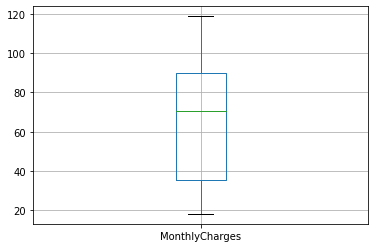

In [18]:
ds.boxplot(column = ['MonthlyCharges'])

NO OUTLIERS!!!

<AxesSubplot:>

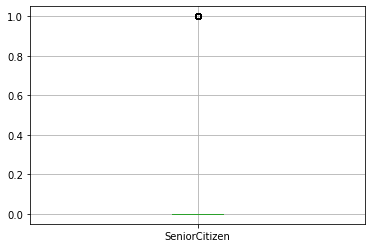

In [19]:
ds.boxplot(column= ['SeniorCitizen'])

Removing Outliers from here

In [20]:
ds = ds[ds['SeniorCitizen']<1.0]

In [21]:
ds['TotalChargesnew']=LE.fit_transform(ds['TotalCharges'])

In [22]:
ds.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churnval,TotalChargesnew
count,5901.0,5901.000000,5901.000000,5901.000000,5901.000000
mean,0.0,32.192171,61.847441,0.236062,2729.701915
std,0.0,24.628639,30.316041,0.424697,1582.412489
min,0.0,0.000000,18.250000,0.000000,0.000000
25%,0.0,9.000000,25.600000,0.000000,1358.000000
50%,0.0,28.000000,65.800000,0.000000,2718.000000
75%,0.0,55.000000,86.700000,0.000000,4100.000000
max,0.0,72.000000,118.750000,1.000000,5485.000000


In [23]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5901 non-null   object 
 1   gender            5901 non-null   object 
 2   SeniorCitizen     5901 non-null   int64  
 3   Partner           5901 non-null   object 
 4   Dependents        5901 non-null   object 
 5   tenure            5901 non-null   int64  
 6   PhoneService      5901 non-null   object 
 7   MultipleLines     5901 non-null   object 
 8   InternetService   5901 non-null   object 
 9   OnlineSecurity    5901 non-null   object 
 10  OnlineBackup      5901 non-null   object 
 11  DeviceProtection  5901 non-null   object 
 12  TechSupport       5901 non-null   object 
 13  StreamingTV       5901 non-null   object 
 14  StreamingMovies   5901 non-null   object 
 15  Contract          5901 non-null   object 
 16  PaperlessBilling  5901 non-null   object 


In [24]:
ds[ds['Churnval']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churnval,TotalChargesnew
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,2137
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,0,1270
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1212
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,1346
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,2221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,677
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,1386
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,4777
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,2538


### DATA CLEANING 

In [25]:
cust_left = ds[ds['Churnval']==1]
cust_not_left =ds[ds['Churnval']==0]

In [26]:
cust_left.shape, cust_not_left.shape

((1393, 23), (4508, 23))

In [27]:
cust_not_left = cust_not_left[:3000]

In [28]:
cust_not_left.shape

(3000, 23)

### DATA OF PEOPLE WHO HAVE NOT LEFT

In [32]:
cust_left

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churnval,TotalChargesnew
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,141
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,814
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,5118
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,2251
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,3599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7011,5482-NUPNA,Female,0,No,No,4,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,60.40,272.15,Yes,1,2028
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes,1,4635
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes,1,4741
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,1,2910


### DATA OF PEOPLE WHO HAVE NOT LEFT

In [29]:
cust_not_left

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churnval,TotalChargesnew
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,2137
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,0,1270
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1212
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,1346
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,2221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4644,5701-ZIKJE,Male,0,No,No,13,Yes,No,DSL,No,...,No,No,Month-to-month,Yes,Mailed check,50.55,610.75,No,0,4198
4646,5032-MIYKT,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,70.70,70.7,No,0,4636
4647,7396-VJUZB,Male,0,Yes,Yes,4,Yes,No,DSL,No,...,No,No,Month-to-month,No,Mailed check,45.25,155.35,No,0,864
4648,9717-QEBGU,Male,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.30,144,No,0,710


In [30]:
ds = cust_not_left.append(cust_left)

In [31]:
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churnval,TotalChargesnew
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,2137
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,0,1270
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1212
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,1346
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,2221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7011,5482-NUPNA,Female,0,No,No,4,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,60.40,272.15,Yes,1,2028
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes,1,4635
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes,1,4741
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,1,2910


In [105]:
ds.describe().columns

Index(['gender', 'SeniorCitizen', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'MonthlyCharges', 'Churnval',
       'TotalChargesnew'],
      dtype='object')

The Data is now clean and the next step is to train and test the model

In [77]:
X = ds[['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalChargesnew','gender','Dependents','TechSupport','InternetService','OnlineSecurity']].values
Y = ds[['Churnval']].values

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

In [80]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3514, 9), (879, 9), (3514, 1), (879, 1))

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
LR = LogisticRegression()

In [83]:
LR.fit(X_train, Y_train)

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [84]:
LR.intercept_

array([-0.9205278])

In [85]:
LR.coef_

array([[ 0.00000000e+00, -4.58134294e-02,  2.81450182e-02,
         5.03442354e-05, -1.48673050e-01, -3.85266430e-01,
        -3.48778757e-01, -2.18018249e-02, -3.38400148e-01]])

In [86]:
Y_pred = LR.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(Y_pred, Y_test)

0.7804323094425484

The accuracy we are getting using Logistic Regression is 78%

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
KN = KNeighborsClassifier()

In [92]:
KN

KNeighborsClassifier()

In [93]:
KN.fit(X_train, Y_train)

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier()

In [52]:
Y_pred = KN.predict(X_test)

In [94]:
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [95]:
accuracy_score(Y_pred, Y_test)

0.7804323094425484

The accuracy through KNN is also 78%

COLUMNS WE HAVE : 'SeniorCitizen', 'tenure', 'MonthlyCharges','TotalChargesnew','gender','Dependents','TechSupport','InternetService','OnlineSecurity'

In [96]:
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churnval,TotalChargesnew
0,7590-VHVEG,0,0,Yes,0,1,No,No phone service,0,0,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,2137
1,5575-GNVDE,1,0,No,0,34,Yes,No,0,2,...,No,No,One year,No,Mailed check,56.95,1889.5,No,0,1270
3,7795-CFOCW,1,0,No,0,45,No,No phone service,0,2,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1212
6,1452-KIOVK,1,0,No,1,22,Yes,Yes,1,0,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,1346
7,6713-OKOMC,0,0,No,0,10,No,No phone service,0,2,...,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,2221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7011,5482-NUPNA,0,0,No,0,4,Yes,No,0,2,...,No,No,Month-to-month,Yes,Mailed check,60.40,272.15,Yes,1,2028
7018,1122-JWTJW,1,0,Yes,1,1,Yes,No,1,0,...,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes,1,4635
7021,1699-HPSBG,1,0,No,0,12,Yes,No,0,0,...,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes,1,4741
7026,8775-CEBBJ,0,0,No,0,9,Yes,No,0,0,...,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,1,2910


In [99]:
new_input = [['0', '1', '123.85','21370','1', '0', '1', '1', '0']]

The above value are the input values given by user to test the result of our model

In [100]:
new_output = KN.predict(new_input)

C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
C:\Users\rituv\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


In [101]:
new_output

array([0])

0 means Churn = "No" The person will not leave 
This answer is 78% accurate

# QUESTION AND ANSWERS

### Data cleaning including missing values, outliers and multicollinearity. Describe your predictive churn model. How did you select variables to be included in the model?

THE DATA HAS BEEN CLEANED AND ALL THE MISSING VALUES AND OUTLIERS HAVE BEEN FIXED.         
THE VALUES I HAVE SELECTED FOR TRAINING AND TESTING ARE 
'SeniorCitizen', 'tenure','MonthlyCharges','TotalChargesnew','gender','Dependents','TechSupport','InternetService','OnlineSecurity'     

### Demonstrate the performance of the model

I have used Linear Regression and KNN model. The model is performing well and it is giving an accuracy of 78%

### What are the key factors that predict customer churn? Do these factors make sense?

Key values :  'SeniorCitizen', 'tenure',  'MonthlyCharges' , 'TotalChargesnew' , 'Dependents' , 'TechSupport' , 'InternetService' , 'OnlineSecurity'

1. Senior Citizen may have different expectations from the company as mostly they use phone for only calling purpose and not other services,

2. Tenure plays an important role as the plans varies with period of subscription 

3. Montly Chargers - different companies provide different monlty plans for varying services

4. Total charges affect the person's plan to chun as other companies may give discount on the total charges when it comes to postpaid

Similarly  'Dependents' , 'TechSupport' , 'InternetService' , 'OnlineSecurity' also helps decide whether the person may Churn or not

### What offers should be made to which customers to encourage them to remain with company?

I think 'Montly Chargers', 'Internet Services' and 'Tenure' plays an important role here
The montly charges of the people with longer subscription should be low so they choose to remain in the company

### Assuming these actions were implemented, how would you determine whether they had worked?

<AxesSubplot:>

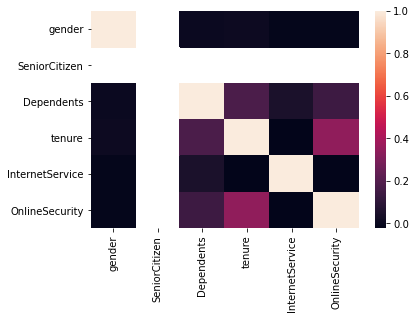

In [111]:
sns.heatmap(ds.iloc[:,1:12].corr())

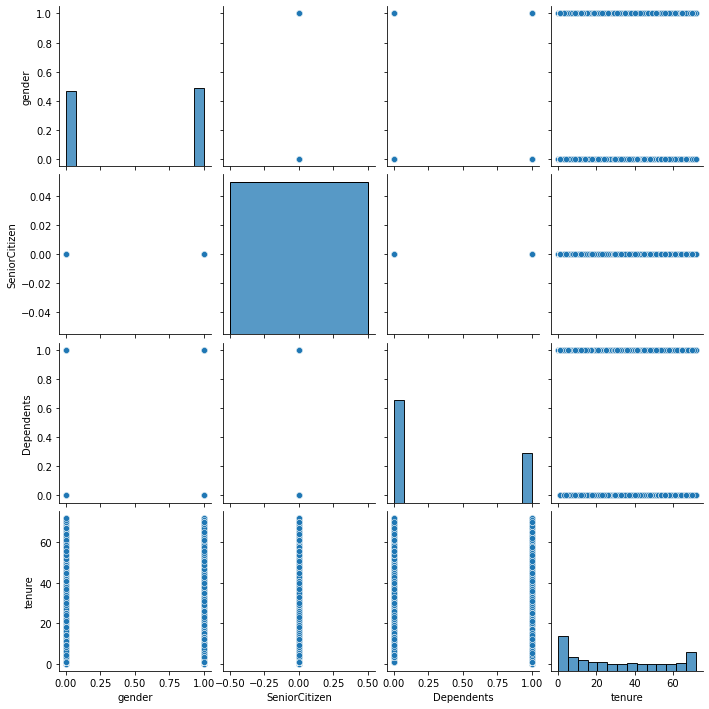

In [109]:
sns.pairplot(ds.iloc[:,1:6])

This is a heatmap and pairplot to show the relations between different factors affecting the Churn which clearly shows the values afecting it the most